In [1]:
import sys

In [2]:
sys.version

'3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) \n[Clang 6.0 (clang-600.0.57)]'

In [4]:
from keras.datasets import mnist

In [5]:
# Keras에는 두 가지 형태의 모델이 있습니다. [모델] Sequential과 [모델] 함수형 API입니다.

In [6]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os

MODEL_SAVE_FOLDER_PATH = './model/'

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + 'mnist-' + '{epoch:02d}-{val_loss:.4f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)

cb_early_stopping = EarlyStopping(monitor='val_loss', patience=10)

(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_validation = X_validation.reshape(X_validation.shape[0], 784).astype('float64') / 255
# 데이터를 float 타입으로 변환 후 스케일링한다. 이는 이미지를 전처리하는 보편적인 방법 중 하나이다

Y_train = np_utils.to_categorical(Y_train, 10)
Y_validation = np_utils.to_categorical(Y_validation, 10)

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
# 선형, 게층적 Sequential 모델
# 1계층, 활성화 함수 == relu
# 2게층, 활성화 함수 == softmax

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
# model compile 과정

In [7]:
for rest_model in os.listdir('./model/'):
    if rest_model[-5:] == '.hdf5':
        os.remove('./model/'+rest_model)
        print(rest_model)
    else:
        continue;
# 재실행 하였을 때, 과거 세이빙모델 제거

mnist-03-0.0837.hdf5
mnist-05-0.0685.hdf5
mnist-08-0.0612.hdf5
mnist-04-0.0740.hdf5
mnist-01-0.1583.hdf5
mnist-10-0.0593.hdf5
mnist-06-0.0639.hdf5
mnist-02-0.1113.hdf5


In [8]:



hist = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation),
          epochs=30, batch_size=200, verbose=0,
          callbacks=[cb_checkpoint, cb_early_stopping])

print('\nAccuracy: {:.4f}'.format(model.evaluate(X_validation, Y_validation)[1]))


Epoch 00001: val_loss improved from inf to 0.15465, saving model to ./model/mnist-01-0.1546.hdf5

Epoch 00002: val_loss improved from 0.15465 to 0.09997, saving model to ./model/mnist-02-0.1000.hdf5

Epoch 00003: val_loss improved from 0.09997 to 0.08846, saving model to ./model/mnist-03-0.0885.hdf5

Epoch 00004: val_loss improved from 0.08846 to 0.07762, saving model to ./model/mnist-04-0.0776.hdf5

Epoch 00005: val_loss improved from 0.07762 to 0.06949, saving model to ./model/mnist-05-0.0695.hdf5

Epoch 00006: val_loss improved from 0.06949 to 0.06500, saving model to ./model/mnist-06-0.0650.hdf5

Epoch 00007: val_loss improved from 0.06500 to 0.06360, saving model to ./model/mnist-07-0.0636.hdf5

Epoch 00008: val_loss improved from 0.06360 to 0.06065, saving model to ./model/mnist-08-0.0607.hdf5

Epoch 00009: val_loss did not improve from 0.06065

Epoch 00010: val_loss improved from 0.06065 to 0.06041, saving model to ./model/mnist-10-0.0604.hdf5

Epoch 00011: val_loss did not imp

In [9]:
print(X_train.shape, X_train.dtype)
# train 데이터의 차원, 데이터 타입
print(Y_train[:5])
# 정답은 y_train 데이터에 라벨링 되어있음


(60000, 784) float64
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.predict(X_validation[:1, :])

array([[3.81178873e-11, 8.30103808e-15, 6.78884238e-09, 1.99584474e-06,
        4.03509132e-15, 6.97369571e-13, 1.35395876e-17, 9.99997973e-01,
        1.99394301e-09, 1.12616205e-09]], dtype=float32)

In [12]:
model.predict_classes(X_validation[:1, :], verbose=0)

array([7])

In [13]:
layer_0 = model.layers[0]
layer_1 = model.layers[1]

In [14]:
print(layer_0.name, type(layer_0), layer_0.output_shape, layer_0.activation.__name__, layer_0.count_params())

dense_1 <class 'keras.layers.core.Dense'> (None, 512) relu 401920


In [15]:
import matplotlib.pyplot as plt

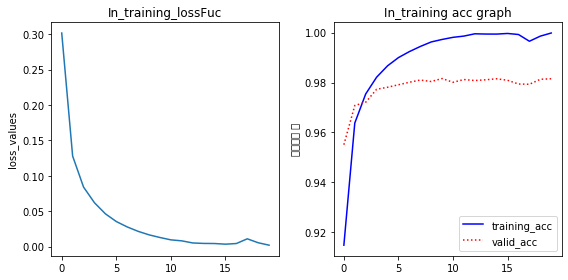

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("In_training_lossFuc")
plt.ylabel("loss_values")
plt.subplot(1, 2, 2)
plt.title("In_training acc graph")
plt.ylabel("성능지표 값")
plt.plot(hist.history['accuracy'], 'b-', label="training_acc")
plt.plot(hist.history['val_accuracy'], 'r:', label="valid_acc")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# 첫번째 레이어의 가중치
w1 = layer_0.get_weights()
w1[0].shape, w1[1].shape

((784, 512), (512,))

In [19]:
# 두번째 레이어의 가중치
w2 = layer_1.get_weights()
w2[0].shape, w2[1].shape

((512, 10), (10,))

In [20]:
from datetime import datetime as day
# 현재 날짜 관련 lib
if not os.path.isdir(MODEL_SAVE_FOLDER_PATH + 'mnist'):
    os.mkdir(MODEL_SAVE_FOLDER_PATH+'mnist')
if not os.path.isfile(MODEL_SAVE_FOLDER_PATH + 'mnist/'+str(day.today().month)+str(day.today().day)+'.hdf5'): 
    model.save('./model/mnist/'+str(day.today().month)+str(day.today().day)+'.hdf5')
    # 모델 저장
    

In [21]:
del model

In [22]:
from keras.models import load_model
# 모델 로드

In [23]:
model2 = load_model('./model/mnist/'+str(day.today().month)+str(day.today().day)+'.hdf5')

In [24]:
print(model2.predict_classes(X_validation[:100, :], verbose=0))

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
